In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir(r"C:\Users\EMILIO\Desktop\0. Cursos\4. Advanced Computer Vision\EdgeYoloSamPipeline")

In [8]:
from src.data.dataloaders import create_dataloader

IMG_DIR = "data/raw/train2017"
ANN_PATH = "data/raw/annotations/instances_train2017.json"


loader = create_dataloader(
    img_dir=IMG_DIR,
    ann_path=ANN_PATH,
    batch_size=2
)

loading annotations into memory...
Done (t=5.23s)
creating index...
index created!


In [9]:
from src.data.datasets import CocoDetectionSegmentation

ds = CocoDetectionSegmentation(
    img_dir=IMG_DIR,
    ann_path=ANN_PATH
)

sample = ds[0]

# print(type(sample))
# print(sample.keys())

loading annotations into memory...
Done (t=5.32s)
creating index...
index created!


In [22]:
img, boxes, masks = ds[80]
print(img.shape)
print(masks.shape)
print(boxes.shape)

torch.Size([3, 640, 640])
torch.Size([4, 640, 640])
torch.Size([4, 4])


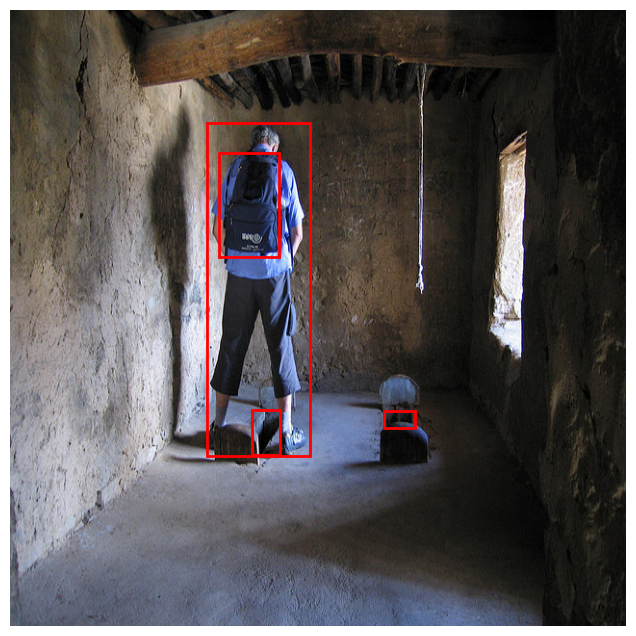

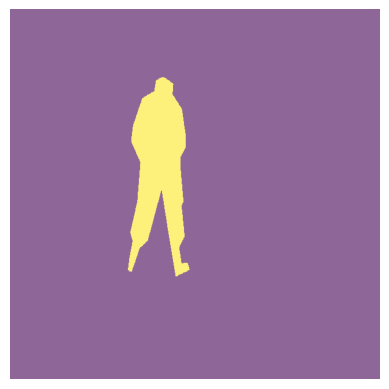

In [23]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# If it's already numpy, do NOT permute
if hasattr(img, "permute"):
    img_vis = img.permute(1, 2, 0).cpu().numpy()
else:
    img_vis = img  # already numpy

fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(img_vis)

for box in boxes:
    x1, y1, x2, y2 = box
    rect = patches.Rectangle(
        (x1, y1),
        x2 - x1,
        y2 - y1,
        linewidth=2,
        edgecolor='r',
        facecolor='none'
    )
    ax.add_patch(rect)

ax.axis("off")
plt.show()

if masks.shape[0] > 0:
    mask = masks[0].cpu().numpy() if hasattr(masks, "cpu") else masks[0]
    plt.imshow(mask, alpha=0.6)
    plt.axis("off")
    plt.show()
